In [15]:
import pandas as pd

# Load the CSV file from the specified path
file_path = '/Users/carlolasi/Desktop/DATA PROJECT/hotel_booking.csv'
df = pd.read_csv(file_path)

# Display the first few rows to verify
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,713-226-5883,************5498


In [16]:
# Check for missing values
print(df.isnull().sum())

# Display data types
print(df.dtypes)

# Handle missing values (example: drop rows with missing 'is_canceled')
df = df.dropna(subset=['is_canceled'])


hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

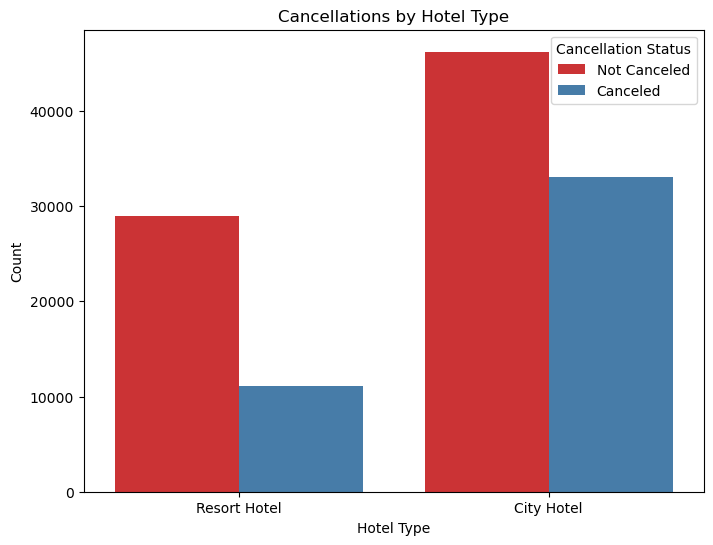

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count cancellations by hotel type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='Set1')
plt.title('Cancellations by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Cancellation Status', loc='upper right', labels=['Not Canceled', 'Canceled'])
plt.show()


<Figure size 1200x600 with 0 Axes>

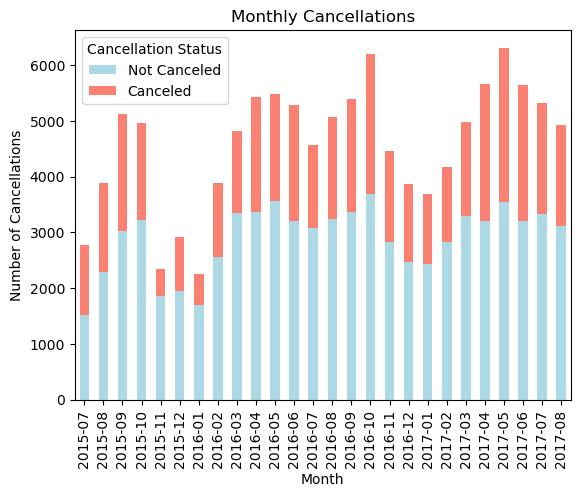

In [18]:
# Convert 'arrival_date' to datetime if it exists
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_day_of_month'].astype(str))

# Count cancellations by month
cancellations_per_month = df.groupby(df['arrival_date'].dt.to_period('M'))['is_canceled'].value_counts().unstack().fillna(0)

plt.figure(figsize=(12, 6))
cancellations_per_month.plot(kind='bar', stacked=True, color=['lightblue', 'salmon'])
plt.title('Monthly Cancellations')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.legend(title='Cancellation Status', labels=['Not Canceled', 'Canceled'])
plt.show()


In [19]:
# Encode categorical features
df_encoded = pd.get_dummies(df, columns=['hotel', 'arrival_date_month', 'deposit_type'], drop_first=True)

# Define features and target variable
X = df_encoded.drop(['is_canceled', 'arrival_date', 'name', 'phone-number', 'credit_card'], axis=1)  # Drop sensitive info
y = df_encoded['is_canceled']


In [21]:
# Check the first few rows and data types
print(X_train.dtypes)
print(X_train.head())


lead_time                           int64
arrival_date_year                   int64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests         

In [22]:
# Ensure that categorical variables are encoded properly
df_encoded = pd.get_dummies(df, columns=['hotel', 'arrival_date_month', 'deposit_type', 'customer_type'], drop_first=True)

# Check the data types and drop sensitive information
X = df_encoded.drop(columns=['is_canceled', 'name', 'phone-number', 'credit_card'])
y = df_encoded['is_canceled']


In [23]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
print(df.columns)


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'phone-number',
       'credit_card', 'arrival_date'],
      dtype='object')


In [27]:
# Define features and target variable
X = df.drop(columns=['is_canceled'])  # Use 'is_canceled' as the target
y = df['is_canceled']

# Display the first few rows of X and y to verify
print(X.head())
print(y.head())


          hotel  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel        342               2015               July   
1  Resort Hotel        737               2015               July   
2  Resort Hotel          7               2015               July   
3  Resort Hotel         13               2015               July   
4  Resort Hotel         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
0                        0                     0       2       0.0  ...   
1                        0                     0       2       0.0  ...   
2                

In [28]:
# Identify categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [29]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Create a Column Transformer for One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns unchanged
)


In [30]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline with preprocessing and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [31]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Identify categorical columns and exclude date columns
date_cols = ['arrival_date']  # List of datetime columns
X = df.drop(columns=['is_canceled'] + date_cols)  # Drop target and datetime columns
y = df['is_canceled']

# Identify categorical columns after excluding datetime columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [34]:
# Identify and exclude date columns and the target variable
date_cols = ['arrival_date']  # List of datetime columns
X = df.drop(columns=['is_canceled'] + date_cols)  # Drop target and datetime columns
y = df['is_canceled']  # Target variable


In [35]:
# Identify categorical columns after excluding datetime columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


In [36]:
# Create a Column Transformer for One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep non-categorical columns unchanged
)


In [37]:
# Create a pipeline with preprocessing and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


In [38]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Create a Column Transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), X.select_dtypes(exclude=['object']).columns),  # For numerical columns, fill missing with the mean
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # For categorical columns, fill missing with the most frequent value
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Then one-hot encode categorical data
        ]), categorical_cols)
    ],
    remainder='passthrough'  # Keep the remaining columns as they are
)

# Create a pipeline with preprocessing and the Random Forest model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [41]:
# Drop rows with missing values
df_clean = df.dropna()

# Split the cleaned data into features and target
X_clean = df_clean.drop(columns=['is_canceled'] + date_cols)
y_clean = df_clean['is_canceled']

# Continue with the same steps for model training
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14851
           1       1.00      1.00      1.00      8929

    accuracy                           1.00     23780
   macro avg       1.00      1.00      1.00     23780
weighted avg       1.00      1.00      1.00     23780



In [42]:
from sklearn.ensemble import RandomForestClassifier

# Limit max depth of the trees
model = RandomForestClassifier(max_depth=10, random_state=42)
pipeline.set_params(classifier=model)

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status',
                                                   'reservation_status_date',
                                                   'name', 'phone-number',
                                                   'credit_card'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [43]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
pipeline.set_params(classifier=model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status',
                                                   'reservation_status_date',
                                                   'name', 'phone-number',
                                                   'credit_card'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, random_state=42))])

In [44]:
model = RandomForestClassifier(min_samples_split=10, random_state=42)
pipeline.set_params(classifier=model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status',
                                                   'reservation_status_date',
                                                   'name', 'phone-number',
                                                   'credit_card'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])

In [45]:
model = RandomForestClassifier(min_samples_leaf=4, random_state=42)
pipeline.set_params(classifier=model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status',
                                                   'reservation_status_date',
                                                   'name', 'phone-number',
                                                   'credit_card'])])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4, random_state=42))])

In [46]:
model = RandomForestClassifier(max_features='sqrt', random_state=42)
pipeline.set_params(classifier=model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not...
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status',
                                                   'reservation_status_date',
                                                   'name', 'phone-number',
                                                   'credit_card'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())


Cross-validation scores: [0.9998423  0.99994743 1.         0.99994743 0.9998423 ]
Mean cross-validation score: 0.9999158935000866


In [48]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=42)
pipeline.set_params(classifier=model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status',
                                                   'reservation_status_date',
                                                   'name', 'phone-number',
                                                   'credit_card'])])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [49]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
pipeline.set_params(classifier=model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', SimpleImputer(),
                                                  Index(['lead_time', 'arrival_date_year', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['hotel',
                                                   'arrival_date_month', 'meal',
                                                   'country', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type',
                                                   'reservation_status',
                                                   'reservation_status_date',
                                                   'name', 'phone-number',
                                                   'credit_card'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [50]:
X = df.drop(columns=['is_canceled', 'reservation_status', 'reservation_status_date', 'name', 'phone-number', 'credit_card'])


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# One-hot encode the categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Calculate correlation matrix
corr_matrix = X_train_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.show()
